In [22]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
df= pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [23]:
# %%
#cleaning df (mục đích tạo ra dòng mới với format=Date+Time, Thế các dữ liệu NaN trong cột time thành 0:00, Đồng thời xóa các kí hiệu thừa)
df['Time'] = df['Time'].replace(np.nan, '00:00') 
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00') 

df['Time'] = df['Date'] + ' ' + df['Time'] 
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
df['Time'] = df['Time'].apply(todate) 
print('Date ranges from ' + str(df.Time.min()) + ' to ' + str(df.Time.max()))

df.Operator = df.Operator.str.upper() #tránh trùng lắp dữ liệu

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [ ]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


Count là số lượng dòng của các cột cụ thể là các cột

Mean là giá trị trung bình mỗi cột

std là độ lệch chuẩn của mỗi cột

min là giá trị nhỏ nhất của mỗi cột

25% là thể hiện 25% giá trị nhỏ hơn ở các cột

50%,75% tương tự 25%

max là giá lớn nhất trong các cột

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   object        
 1   Time          5268 non-null   datetime64[ns]
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


In [ ]:
df.dtypes
df.isnull().sum().sort_values(ascending=False)

Flight #        4199
Route           1706
cn/In           1228
Summary          390
Registration     335
Type              27
Ground            22
Aboard            22
Location          20
Operator          18
Fatalities        12
Time               0
Date               0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)
for column in df.columns:
  percent=df[column].isnull().mean()
  print(f'{column}:{round(percent*100,3)}')

Date:0.0
Time:0.0
Location:0.38
Operator:0.342
Flight #:79.708
Route:32.384
Type:0.513
Registration:6.359
cn/In:23.311
Aboard:0.418
Fatalities:0.228
Ground:0.418
Summary:7.403


Chỉ có cột Date và Time không có bị missing data. Các cột khác hầu như bị missing data ít trừ cột Flight và cn/In và Route cao (có tỉ lệ missing data lần lượt là 79.708 23.311 32.384)

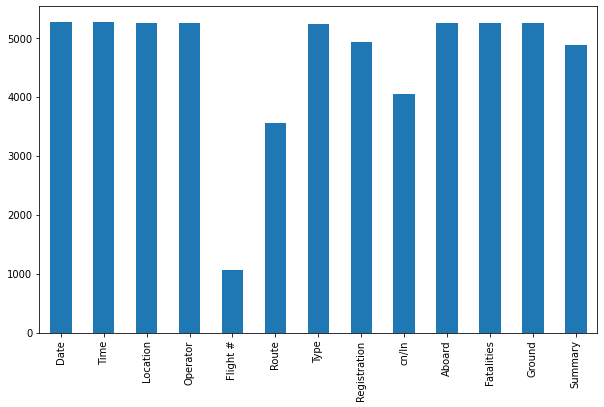

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
df.count().plot(kind="bar")

Text(0.5, 1.0, 'Total number of accidents by Type of flight')

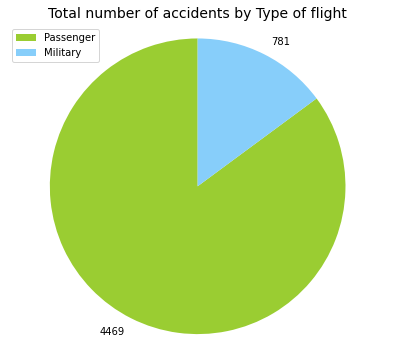

In [ ]:
# %%
#Câu 2:
Temp = df.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']
Temp2 = df.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)


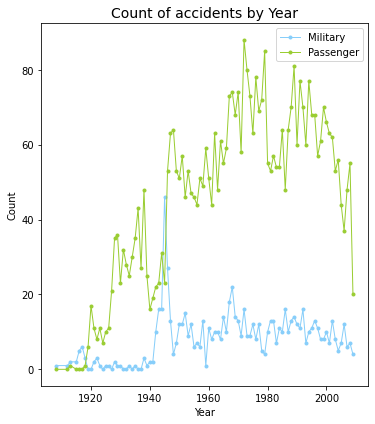

In [24]:
# %%
plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

